### Actividad Práctica 4.3: Visualización de Datos

Voy a resolver la actividad paso a paso de la manera más actualizada, utilizando las bibliotecas matplotlib y seaborn para crear visualizaciones de datos.

#### Objetivo:
Crear diferentes tipos de visualizaciones (gráficos de barras, líneas, dispersión y boxplots) para analizar un conjunto de datos y descubrir patrones y tendencias.


In [1]:
# Importación de librerías y paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from scipy import stats
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Paso 1: Selección del conjunto de datos
Para este ejercicio, utilizaré el conjunto de datos de ventas de productos (puede ser un dataset relacionado con ventas de una tienda en línea o datos de ventas mensuales de productos), que contiene información como:
- Meses: Periodo de ventas.
- Ventas: Ingresos mensuales generados por ventas.
- Producto: Categorías de productos vendidos.

Para facilitar el ejercicio, voy a generar un conjunto de datos sintético.


#### Paso 2: Generación del conjunto de datos sintético

Generamos un conjunto de datos sintético de ventas mensuales para productos en un año:


In [2]:
# Carga de datos de un DataFrame online sobre los datos de ventas de más de 16,500 juegos.
data = pd.read_csv('vgsales.csv')

# Verificar los primeros registros
print('Cantidad de registros y columnas:', data.shape)

# Verificar los nombres de las columnas
print(data.columns)

# Verificar los tipos de datos
print(data.dtypes)

# Visualización de los primeros 5 registros del DataFrame
data.head()


Cantidad de registros y columnas: (16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Explicación:

- Utilizamos pd.date_range() para generar los meses del año 2023.

- Los valores de ventas se generan aleatoriamente con np.random.randint(), representando ingresos entre 1,000 y 10,000 para cada producto.


#### Paso 3: Crear diferentes tipos de visualizaciones

Vamos a crear los siguientes tipos de gráficos:
- Gráfico de barras: Para mostrar las ventas mensuales de cada producto.
- Gráfico de líneas: Para visualizar las tendencias de ventas a lo largo del tiempo.
- Gráfico de dispersión: Para comparar las ventas de dos productos.
- Boxplot: Para observar la dispersión y los valores atípicos de las ventas por producto.

##### 1. Gráfico de barras

Este gráfico muestra las ventas de cada producto durante todo el año.


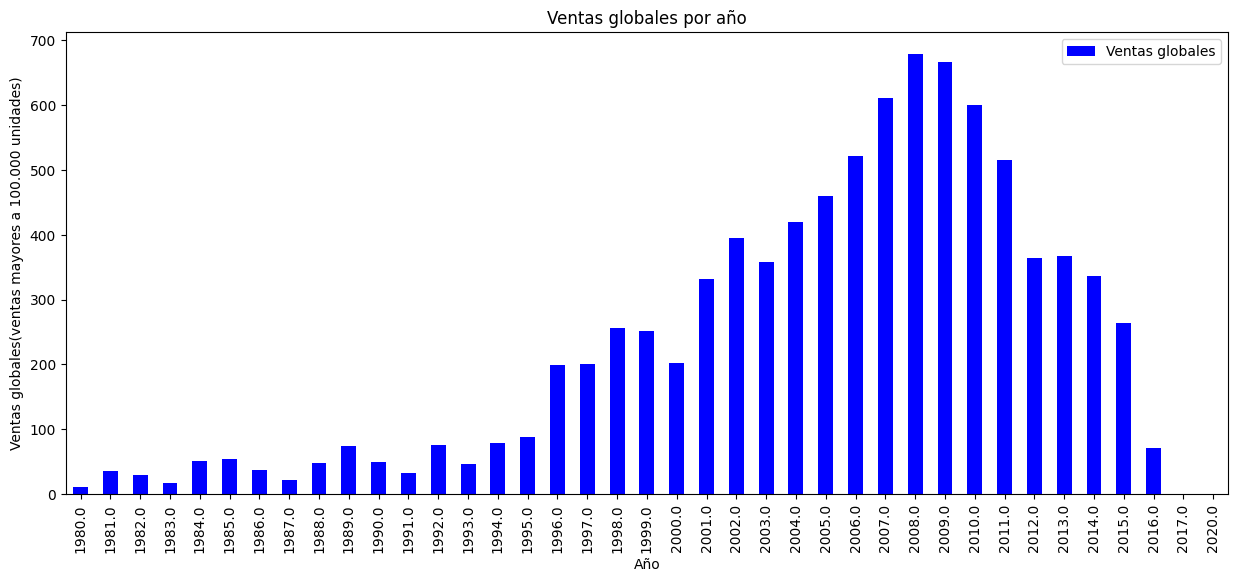

In [3]:
# Este gráfico muestra las ventas de cada producto durante todo el año. Para ello, se ha utilizado la función groupby() para agrupar los datos por año y la función sum() para sumar las ventas de cada producto en cada año. Luego, se ha utilizado la función plot() para graficar los datos.'''

# Agrupar los datos por año y sumar las ventas de cada producto en cada año
yearly_sales = data.groupby('Year').sum()

# Graficar las ventas de cada producto en cada año
yearly_sales['Global_Sales'].plot(kind='bar', figsize=(15, 6), legend=True, color='blue')
plt.title('Ventas globales por año')
plt.xlabel('Año')
plt.ylabel('Ventas globales(ventas mayores a 100.000 unidades)')

plt.legend(['Ventas globales'])
plt.show()

Explicación:

- Usamos df_ventas.plot(kind='bar') para crear un gráfico de barras.

- El gráfico muestra cómo las ventas varían de mes a mes para cada producto.


##### 2. Gráfico de líneas
Este gráfico muestra las tendencias de ventas de cada producto a lo largo del tiempo.



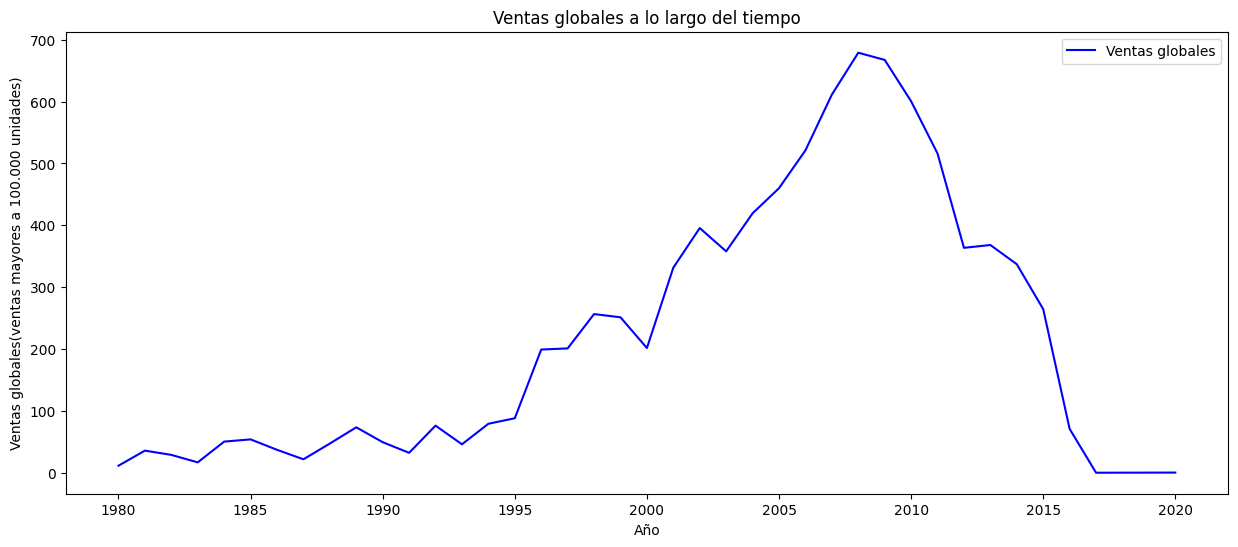

In [4]:
# Gráfico de líneas: Para visualizar las tendencias de ventas a lo largo del tiempo.

# Graficar las ventas globales a lo largo del tiempo
yearly_sales['Global_Sales'].plot(kind='line', figsize=(15, 6), legend=True, color='blue')
plt.title('Ventas globales a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas globales(ventas mayores a 100.000 unidades)')

plt.legend(['Ventas globales'])
plt.show()

Explicación:

- Utilizamos df_ventas.plot(kind='line') para graficar las ventas a lo largo del tiempo (meses).

- marker='o' agrega puntos en cada mes para mejorar la visualización.


##### 3. Gráfico de dispersión

Comparamos las ventas de Electrónica vs Ropa a lo largo del tiempo.


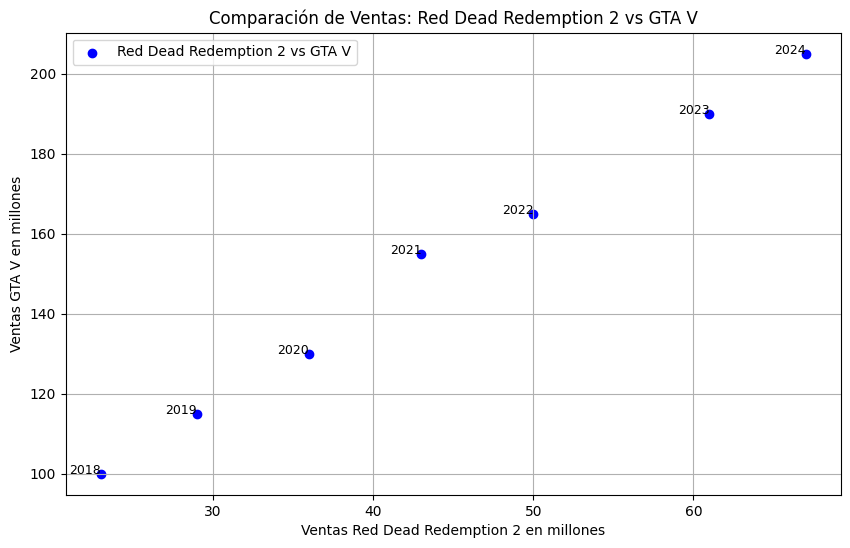

In [8]:
# Datos de ejemplo
data = {
    'Año': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Red_Dead_Redemption_2_ventas': [23, 29, 36, 43, 50, 61, 67]
}
data_2 = {
    'Año': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'GTA_V_ventas': [100, 115, 130, 155, 165, 190, 205]
}

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data['Red_Dead_Redemption_2_ventas'], data_2['GTA_V_ventas'], color='blue', label='Red Dead Redemption 2 vs GTA V')

# Añadir etiquetas de años a los puntos
for i, año in enumerate(data['Año']):
    plt.text(data['Red_Dead_Redemption_2_ventas'][i], data_2['GTA_V_ventas'][i], str(año), fontsize=9, ha='right')

# Añadir títulos y etiquetas
plt.title('Comparación de Ventas: Red Dead Redemption 2 vs GTA V')
plt.xlabel('Ventas Red Dead Redemption 2 en millones')
plt.ylabel('Ventas GTA V en millones')
plt.legend(loc='upper left')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Explicación:
- plt.scatter() crea el gráfico de dispersión entre las ventas de los productos "Electrónica" y "Ropa".
- Este gráfico nos permite observar si hay alguna relación entre las ventas de ambos productos.


##### 4. Boxplot
Este gráfico muestra la dispersión y los valores atípicos de las ventas por producto.


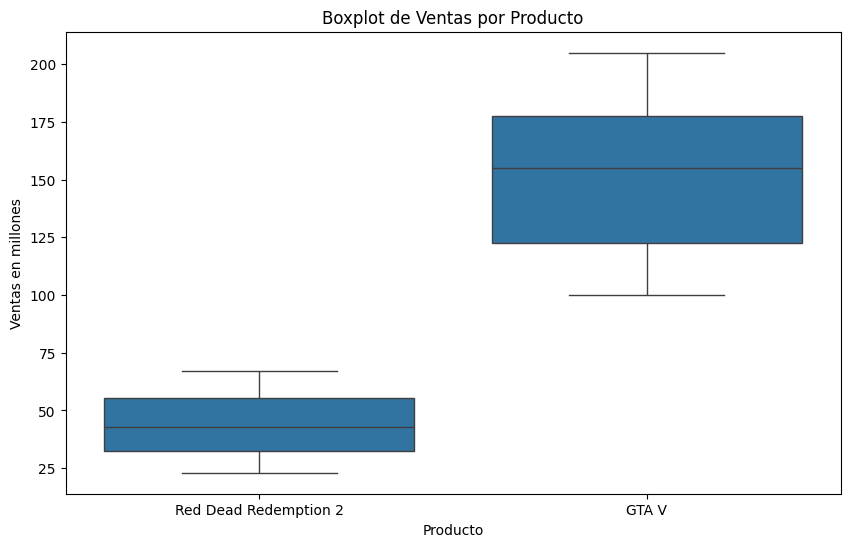

In [16]:
# Boxplot: Para observar la dispersión y los valores atípicos de las ventas por producto.
data = {
    'producto': ['Red Dead Redemption 2', 'Red Dead Redemption 2', 'Red Dead Redemption 2', 'Red Dead Redemption 2', 'Red Dead Redemption 2', 'Red Dead Redemption 2', 'Red Dead Redemption 2',
                 'GTA V', 'GTA V', 'GTA V', 'GTA V', 'GTA V', 'GTA V', 'GTA V'],
    'ventas': [23, 29, 36, 43, 50, 61, 67, 100, 115, 130, 155, 165, 190, 205],
    'año': [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Función para crear el boxplot
def plot_boxplot(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='producto', y='ventas', data=df)
    plt.title('Boxplot de Ventas por Producto')
    plt.ylabel('Ventas en millones')
    plt.xlabel('Producto')
    plt.show()

# Llamar a la función para crear el boxplot
plot_boxplot(df)

Explicación:
- Usamos sns.boxplot() para visualizar la dispersión de las ventas de cada producto.
- El boxplot nos permite observar la mediana, los cuartiles, y los valores atípicos (outliers) de las ventas.


#### Paso 4: Análisis de los patrones y tendencias visibles
Análisis de los gráficos:

- Gráfico de barras:


Se pueden observar las diferencias en las ventas de cada producto a lo largo del año. Algunos productos como "Electrónica" y "Alimentos" podrían mostrar ventas más estables, mientras que "Ropa" podría tener picos de ventas en ciertos meses, como en temporada de descuentos.

- Gráfico de líneas:


Las tendencias de ventas muestran fluctuaciones a lo largo del tiempo. Por ejemplo, en los meses de fin de año, las ventas de ciertos productos pueden ser más altas debido a las festividades o campañas de marketing.

- Gráfico de dispersión:


Podemos observar si hay alguna correlación entre las ventas de "Electrónica" y "Ropa". Si los puntos están dispersos sin un patrón claro, eso sugiere que no hay una relación directa entre las ventas de ambos productos.

- Boxplot:


Este gráfico revela la dispersión de las ventas. Productos con valores atípicos, como "Electrónica", pueden tener meses con ventas extremadamente altas o bajas, mientras que otros productos podrían ser más constantes.

##### Conclusión

- Gráficos de barras: Útiles para comparar valores a través de diferentes categorías.
- Gráficos de líneas: Permiten ver cómo varían las variables a lo largo del tiempo.
- Gráficos de dispersión: Ayudan a detectar relaciones entre dos variables.
- Boxplots: Son excelentes para analizar la variabilidad de los datos y detectar outliers.

Estas visualizaciones nos ayudan a entender mejor los patrones de ventas y a tomar decisiones informadas sobre estrategias de negocio o marketing.
